<a href="https://colab.research.google.com/github/devangi2000/TensorFlow01/blob/master/LSTM_bidirectional_multiLayer_tf_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', as_supervised=True, with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIT76CO/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIT76CO/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIT76CO/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
dataset

{'test': <DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'train': <DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'unsupervised': <DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>}

In [4]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [5]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
num_epochs=10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 313s 800ms/step - loss: 0.5190 - accuracy: 0.7474 - val_loss: 0.7894 - val_accuracy: 0.5004
Epoch 2/10
391/391 [==============================] - 307s 784ms/step - loss: 0.6701 - accuracy: 0.5952 - val_loss: 0.6914 - val_accuracy: 0.5827
Epoch 3/10
391/391 [==============================] - 307s 785ms/step - loss: 0.6225 - accuracy: 0.6519 - val_loss: 0.6055 - val_accuracy: 0.6888
Epoch 4/10
391/391 [==============================] - 306s 783ms/step - loss: 0.5296 - accuracy: 0.7382 - val_loss: 0.4980 - val_accuracy: 0.7656
Epoch 5/10
391/391 [==============================] - 307s 785ms/step - loss: 0.5484 - accuracy: 0.7160 - val_loss: 0.6313 - val_accuracy: 0.6592
Epoch 6/10
391/391 [==============================] - 307s 785ms/step - loss: 0.4682 - accuracy: 0.7791 - val_loss: 0.5149 - val_accuracy: 0.7546
Epoch 7/10
391/391 [==============================] - 306s 783ms/step - loss: 0.3336 - accuracy: 0.8601 - val_loss: 0.4588 -

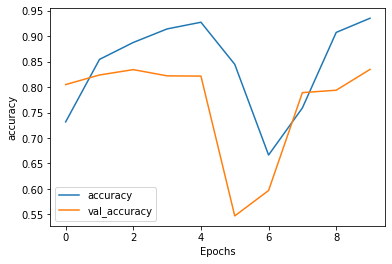

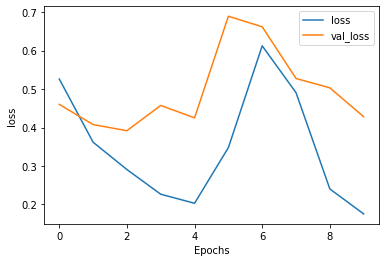

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')